# Ford GoBike System Data
## by Rahma Mustafa Ahmed

### Briefly introduction about dataset
> Our data set provides information about the Individual rides that made in a bike-sharing system that covered in the larger San Francisco Bay Area, California. The fisrt Bike share in Bay Area launched in Aguest 2013. Currently this system has more than 2000 bicycles in 262 stations. Ford GoBike system launched on 2017. This data set in 2019 , Febraury

> Bike-Share system like Ford GoBike, these systems work with bikes specially designed, the bikes are docked at various locations throughout the city. The member can unlock the bikes at any station in the system and returned to any other, making them perfect for one-way trips. The bikes are available for use every day. And riders have access to all of the network's bikes and be member when they purchase.


## Preliminary Wrangling



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
bikedataframe = pd.read_csv('201902-fordgobike-tripdata.csv')
bikedataframe.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [3]:
bikedataframe.shape

(183412, 16)

In [4]:
bikedataframe.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [5]:
bikedataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [6]:
bikedataframe.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
bikedataframe.dropna().shape

(174952, 16)

In [8]:
bikedataframe = bikedataframe.dropna()

In [9]:
bikedataframe['start_station_id'].nunique()

329

In [10]:
bikedataframe['end_station_id'].nunique()

329

In [11]:
bikedataframe.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [12]:
bikedataframe.duplicated().sum()

0

In [13]:
bikedataframe['start_time'] = pd.to_datetime(bikedataframe['start_time'])

In [14]:
bikedataframe['end_time'] = pd.to_datetime(bikedataframe['end_time'])

In [15]:
bikedataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: datetime64[ns](2), float64(7), int64(2), object(5)
memory us

In [16]:
bikedataframe['user_type'].value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

In [17]:
bikedataframe['member_gender'].value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

In [18]:
bikedataframe['bike_share_for_all_trip'].value_counts()

No     157606
Yes     17346
Name: bike_share_for_all_trip, dtype: int64

In [19]:
bikedataframe['age_of_member'] = 2019- bikedataframe['member_birth_year']

In [20]:
bikedataframe['duration_in_min'] = bikedataframe['duration_sec']/60

In [21]:
bikedataframe['member_birth_year'] = bikedataframe['member_birth_year'].astype(int)
bikedataframe['age_of_member'] = bikedataframe['age_of_member'].astype(int)
bikedataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 18 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null int32
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
age_of_member              174952 non-null int32
duration_in_min      

In [22]:
##Thats not logic
bikedataframe['age_of_member'].max()

141

In [23]:
bikedataframe['age_of_member'].describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age_of_member, dtype: float64

In [24]:
bikedataframe['week_day_name'] = bikedataframe['start_time'].dt.strftime('%a')
bikedataframe['week_day_name'].value_counts()

Thu    33712
Tue    30584
Wed    28426
Fri    27663
Mon    25641
Sun    14512
Sat    14414
Name: week_day_name, dtype: int64

In [25]:
bikedataframe['start_time_hour'] = bikedataframe['start_time'].dt.hour
bikedataframe['start_time_hour'].value_counts()

17    20904
8     20227
18    16118
9     15204
16    13473
7     10231
19     9424
15     8646
12     8220
13     8098
10     7970
14     7677
11     7461
20     6211
21     4400
6      3293
22     2793
23     1572
0       893
5       866
1       525
2       355
4       227
3       164
Name: start_time_hour, dtype: int64

In [26]:
bikedataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 20 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null int32
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
age_of_member              174952 non-null int32
duration_in_min      

In [27]:
(bikedataframe['duration_sec'] / 3600).max()

23.485555555555557

In [28]:
( bikedataframe['end_time'].dt.month - bikedataframe['start_time'].dt.month).value_counts()

0    174938
1        14
dtype: int64

In [29]:
bikedataframe.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age_of_member,duration_in_min,week_day_name,start_time_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,35,869.750000,Thu,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,47,1030.900000,Thu,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,30,608.166667,Thu,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,45,26.416667,Thu,23
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,60,29.883333,Thu,23


### What is the structure of your dataset?

> - trip time info: trip start time , end time, duration in seconds and minutes and day of week 
> - stations info: id, name, geolocation 
> - bike id
> - user info: type(Customer or Subscriber), birth year, gender(male, female and other) and age

> some features I may find useful to add it:
>> - member age
>> - duration in minutes
>> - day of week and start time hour

### What is/are the main feature(s) of interest in your dataset?

> I intersted in time of trips and members information


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> - duration_in_mins, start time, end time, start time hour and day of week
> - member info (user_type, member_gender and age_of_member)


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [30]:
bikedataframe['duration_in_min'].describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_in_min, dtype: float64

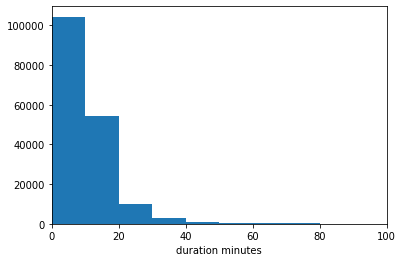

In [31]:
maxx =bikedataframe['duration_in_min'].max()
bins = np.arange(0, maxx+10, 10)
plt.xlim(0, 100);
plt.hist(bikedataframe['duration_in_min'], bins=bins);
plt.xlabel("duration minutes");

we find that this distribution in't normal, so we use log scale instead

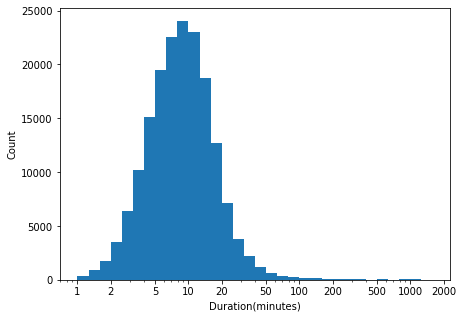

In [32]:
# to get rid of outlireis, let's put it on a log scale instead
maxx= np.log10(bikedataframe['duration_in_min'].max())
bins = 10 ** np.arange(0, maxx+0.1, 0.1)
plt.figure(figsize=[7, 5]);
plt.hist(bikedataframe['duration_in_min'], bins = bins);
plt.xscale('log');
xloc=[1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]
plt.xticks(xloc,xloc);
plt.xlabel('Duration(minutes)');
plt.ylabel('Count');

We can notice now that the distribution is normal, so we can get rid of outliries. The average of duration time of trips is **10  minutes**

In [33]:
bikedataframe = bikedataframe[bikedataframe['duration_in_min'] <= 150]
bikedataframe.shape

(174555, 20)

In [34]:
bikedataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174555 entries, 4 to 183411
Data columns (total 20 columns):
duration_sec               174555 non-null int64
start_time                 174555 non-null datetime64[ns]
end_time                   174555 non-null datetime64[ns]
start_station_id           174555 non-null float64
start_station_name         174555 non-null object
start_station_latitude     174555 non-null float64
start_station_longitude    174555 non-null float64
end_station_id             174555 non-null float64
end_station_name           174555 non-null object
end_station_latitude       174555 non-null float64
end_station_longitude      174555 non-null float64
bike_id                    174555 non-null int64
user_type                  174555 non-null object
member_birth_year          174555 non-null int32
member_gender              174555 non-null object
bike_share_for_all_trip    174555 non-null object
age_of_member              174555 non-null int32
duration_in_min      

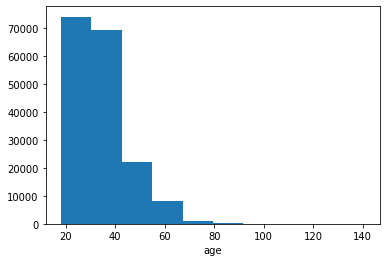

In [35]:
plt.hist(bikedataframe['age_of_member']);
plt.xlabel('age');

this is not normal distribution 

In [36]:
bikedataframe['age_of_member'].max()

141

In [37]:
bikedataframe['age_of_member'].describe()

count    174555.000000
mean         34.196385
std          10.120189
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age_of_member, dtype: float64

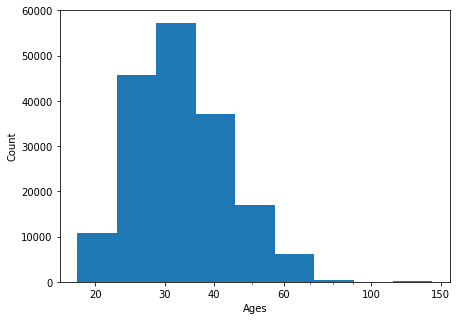

In [38]:
bins_age = 10 ** np.arange(np.log10(bikedataframe['age_of_member'].min()), np.log10(bikedataframe['age_of_member'].max())+0.1, 0.1)
plt.figure(figsize=[7, 5]);
plt.hist(data = bikedataframe, x = 'age_of_member', bins = bins_age);
plt.xscale('log');
xloc=[20,30,40, 60, 100,150]
plt.xticks(xloc,xloc);
plt.xlabel('Ages');
plt.ylabel('Count');

now we distribute the age of members normally using Log scale. Age range between **20 to 50** years

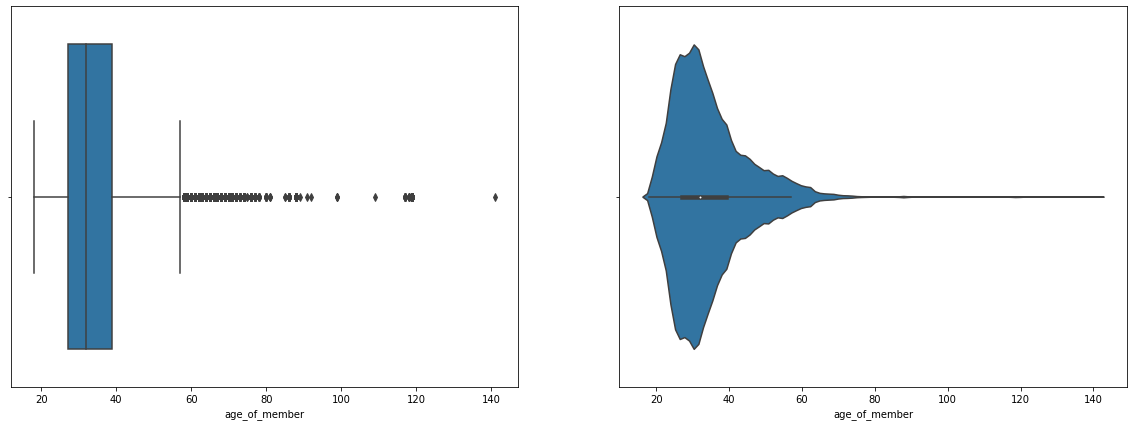

In [39]:
plt.figure(figsize = [20, 7]);
plt.subplot(1, 2, 1)
sb.boxplot(bikedataframe['age_of_member'])
plt.subplot(1, 2, 2)
sb.violinplot(bikedataframe['age_of_member']);

Box plots are great to summarize and visualize the distribution of variables easily and quickly, so we can see the outliries easily
The max age is **141** and it isn't logic

The users ages around **30**. There are not users above age **60**.

In [40]:
bikedataframe = bikedataframe[bikedataframe['age_of_member']<=70]
bikedataframe.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age_of_member,duration_in_min,week_day_name,start_time_hour
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,45,26.416667,Thu,23
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,60,29.883333,Thu,23
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983,Female,No,36,19.116667,Thu,23
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989,Male,No,30,26.916667,Thu,23
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988,Other,No,31,26.166667,Thu,23


In [41]:
bikedataframe['week_day_name'].value_counts()

Thu    33538
Tue    30450
Wed    28299
Fri    27512
Mon    25481
Sun    14383
Sat    14318
Name: week_day_name, dtype: int64

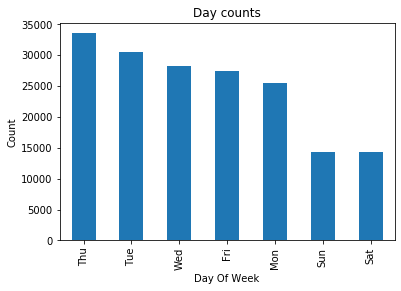

In [42]:
bikedataframe['week_day_name'].value_counts().plot.bar()
plt.xlabel('Day Of Week');
plt.ylabel('Count')
plt.title("Day counts");

We find that Thursday the most day has bike sharing in week as this figure showٍs

In [43]:
bikedataframe['week_day_name'].describe()

count     173981
unique         7
top          Thu
freq       33538
Name: week_day_name, dtype: object

Text(0.5, 1.0, 'Hour counts')

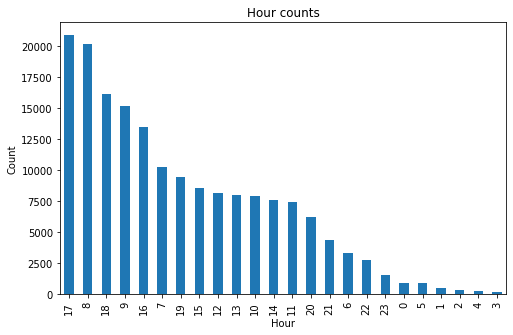

In [44]:
plt.figure(figsize=[8, 5])
bikedataframe['start_time_hour'].value_counts().plot.bar()
plt.xlabel('Hour');
plt.ylabel('Count')
plt.title("Hour counts")

This plot shows that the most hour in day that members use bikes is **5 PM or 8 AM**

Text(0.5, 1.0, 'Hours of trips for users')

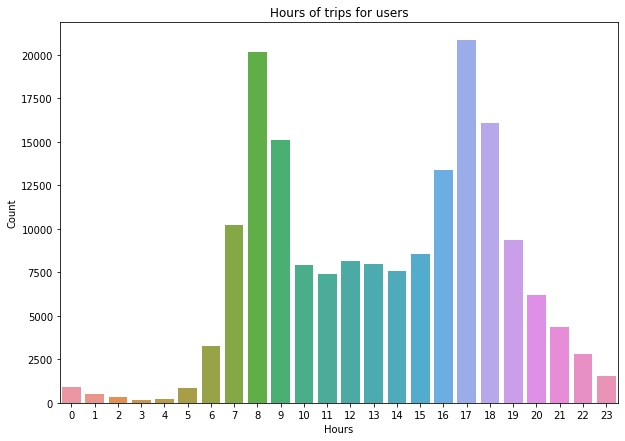

In [45]:
plt.figure(figsize=[10,7])
sb.countplot(bikedataframe['start_time_hour']);
plt.xlabel('Hours');
plt.ylabel('Count');
plt.title("Hours of trips for users")

A lot of trips in 8-9 AM and 5-6 PM on days, so their purpose is going to work and back from it

Text(0, 0.5, 'Count')

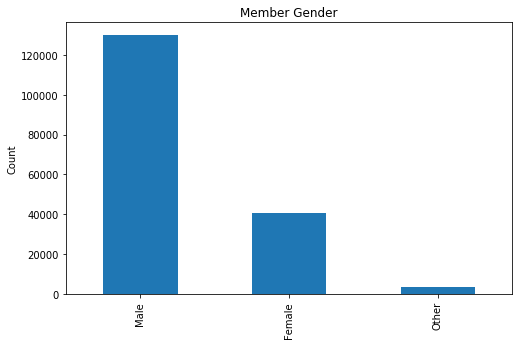

In [46]:
plt.figure(figsize=[8, 5])
bikedataframe['member_gender'].value_counts().plot.bar()
plt.title('Member Gender');
plt.ylabel('Count')

As our figure shows we can notice that males using the system **three times** females that using the system

Text(0, 0.5, 'Count')

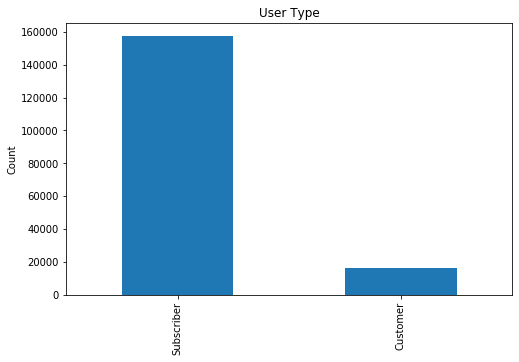

In [47]:
plt.figure(figsize=[8, 5])
bikedataframe['user_type'].value_counts().plot.bar()
plt.title('User Type');
plt.ylabel('Count')

Number of the Subscriber bikers is **8 times** Customers

Text(0, 0.5, 'Count')

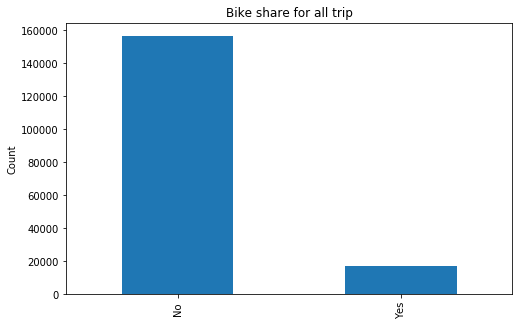

In [48]:
plt.figure(figsize=[8, 5])
bikedataframe['bike_share_for_all_trip'].value_counts().plot.bar()
plt.title('Bike share for all trip');
plt.ylabel('Count')

The difference between yes and No is very huge

In [49]:
bikedataframe['start_station_name'].value_counts().head(2)

Market St at 10th St                                         3637
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3382
Name: start_station_name, dtype: int64

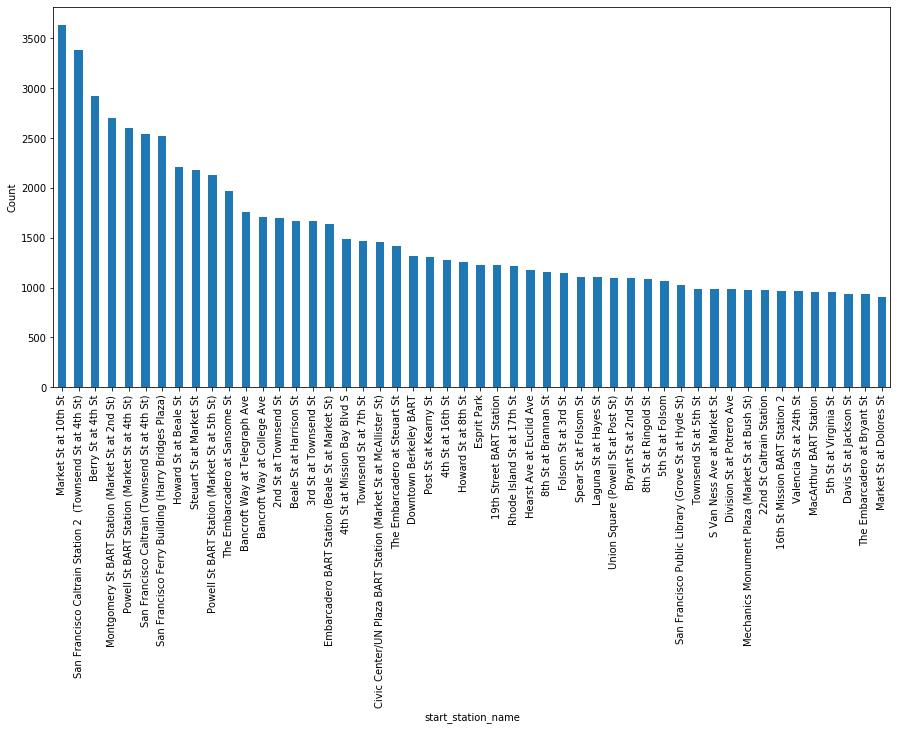

In [50]:
plt.figure(figsize=[15,7])
bikedataframe['start_station_name'].value_counts()[:50].plot.bar()
plt.xlabel('start_station_name');
plt.ylabel('Count');

the most station that users start the trips from is **Market St at 10th St**

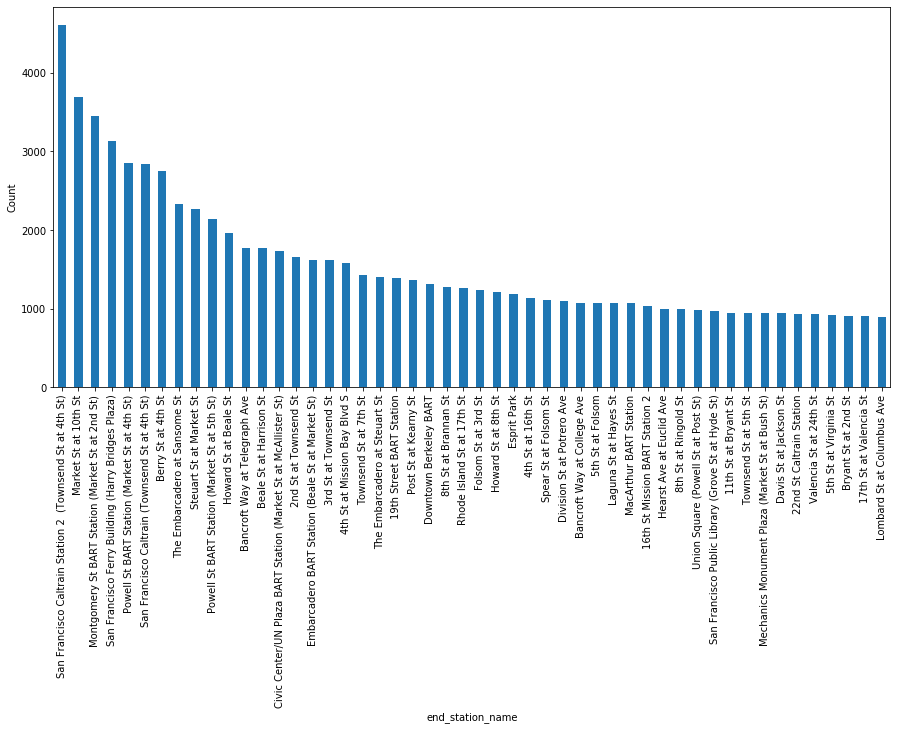

In [51]:
plt.figure(figsize=[15,7])
bikedataframe['end_station_name'].value_counts()[:50].plot.bar()
plt.xlabel('end_station_name');
plt.ylabel('Count');

the most station that users end the trips from is **San Francisco Caltrain St**

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

In [53]:
bikedataframe.to_csv('cleaned_data_bike_share.csv', index=False)


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> - The average duration time of trips is 10 minutes 
> - We find that Thursday the most day has bike sharing in week
> - Number of the Subscriber bikers is 8 times Customers
> - We can notice that males using the system three times females 
> - The users ages around 30. There are not users above age 60.
> - The most hour in day that members use bikes is 5 PM or 8 AM

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Some  distrbutions was not normall so we use log scale to make the range smaller to be more normally
> The normal distrbutions make the operation easily to find the mean and the range of data, and also find the outlires to remove it

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [54]:
bikedataframe.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age_of_member,duration_in_min,week_day_name,start_time_hour
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,45,26.416667,Thu,23
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,60,29.883333,Thu,23
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983,Female,No,36,19.116667,Thu,23
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989,Male,No,30,26.916667,Thu,23
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988,Other,No,31,26.166667,Thu,23


In [55]:
defalut_color = sb.color_palette()[0]

In [56]:
bikedataframe_start_station_mean = bikedataframe.groupby('start_station_name')['duration_in_min'].mean().sort_values(ascending=False)[:50]
bikedataframe_start_station_mean

start_station_name
Palm St at Willow St                         41.122222
Fell St at Stanyan St                        27.606946
Lane St at Revere Ave                        23.428704
Emeryville Public Market                     22.320588
Masonic Ave at Turk St                       22.147679
Backesto Park (Jackson St at 13th St)        21.992157
Lombard St at Columbus Ave                   21.385912
Oak St at 1st St                             21.215556
Newhall St at 3rd St                         20.971333
Williams Ave at 3rd St                       20.716312
Williams Ave at Apollo St                    20.077333
Mendell St at Fairfax Ave                    19.486478
Empire St at 7th St                          19.483951
Willow St at Vine St                         18.977778
Farnam St at Fruitvale Ave                   18.674074
Taylor St at 9th St                          18.619231
O'Farrell St at Divisadero St                18.531740
Addison St at Fourth St                      1

In [113]:
def bar_plot(x,y, color = defalut_color, order=None,xlabel=None,ylabel=None):
    sb.barplot(x=x , y=y,color=defalut_color,order=order)
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);


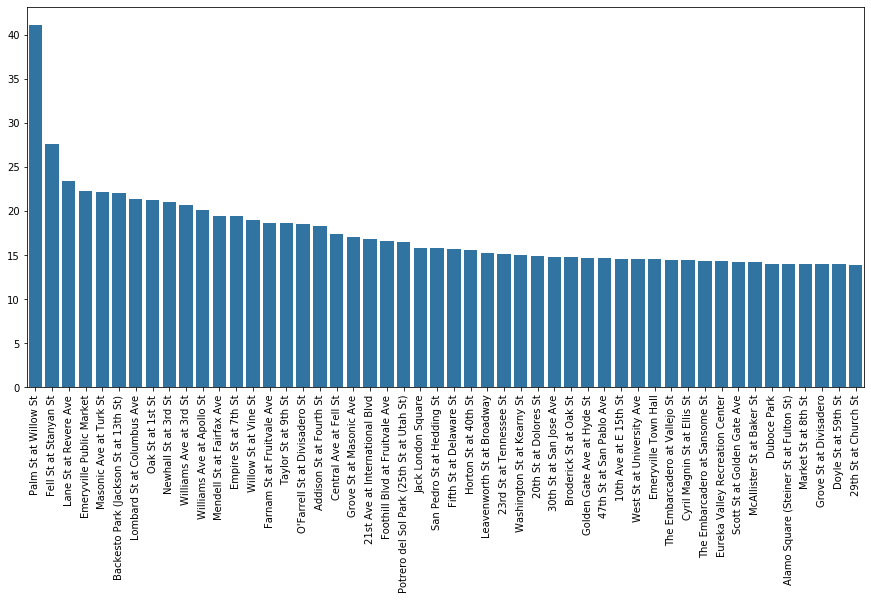

In [116]:
plt.figure(figsize=[15,7])
bar_plot(bikedataframe_start_station_mean.index, bikedataframe_start_station_mean.values)
plt.xticks(rotation=90);


we can notice that the **Palm St at Willow st** is the most start station has duration time

In [58]:
bikedataframe_end_station_mean = bikedataframe.groupby('end_station_name')['duration_in_min'].mean().sort_values(ascending=False)[:50]
bikedataframe_end_station_mean

end_station_name
Fell St at Stanyan St                        30.432305
Palm St at Willow St                         28.971429
Lombard St at Columbus Ave                   26.654102
Masonic Ave at Turk St                       25.377386
Parker Ave at McAllister St                  23.462963
Backesto Park (Jackson St at 13th St)        23.128431
O'Farrell St at Divisadero St                23.064484
Farnam St at Fruitvale Ave                   22.550000
Central Ave at Fell St                       21.650953
Newhall St at 3rd St                         21.018519
Mendell St at Fairfax Ave                    20.268269
San Pedro St at Hedding St                   19.990556
Grove St at Masonic Ave                      19.974365
Bestor Art Park                              19.850877
Emeryville Public Market                     19.586722
Williams Ave at 3rd St                       19.160884
Broderick St at Oak St                       18.602193
Addison St at Fourth St                      17.

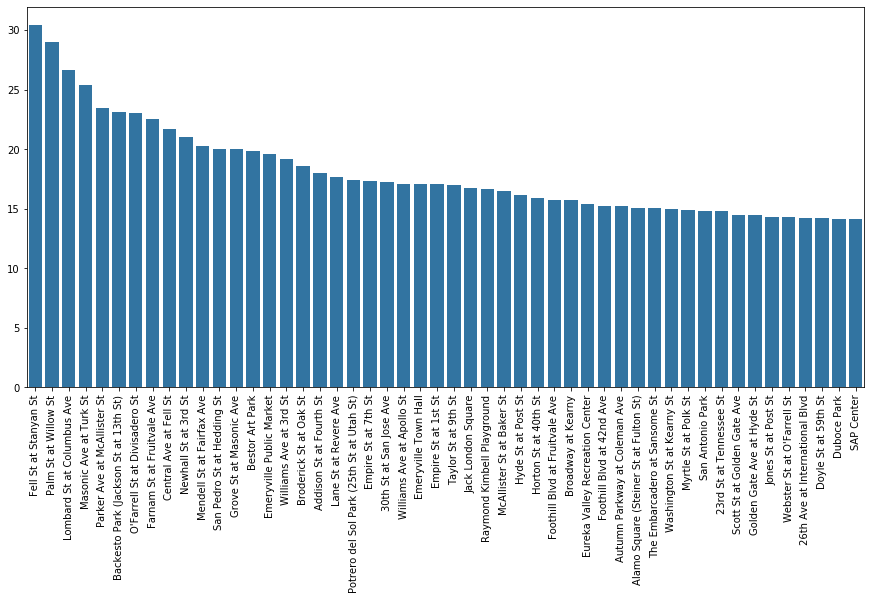

In [115]:
plt.figure(figsize=[15,7])
bar_plot(bikedataframe_end_station_mean.index,bikedataframe_end_station_mean.values )
plt.xticks(rotation=90);

we can notice that the **Fell St at Stanyan st** is the most start station has duration time

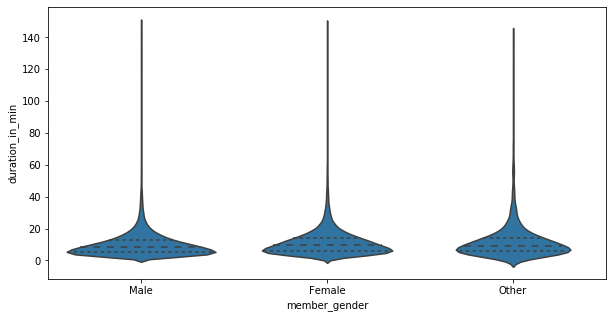

In [60]:
plt.figure(figsize=[10, 5])
sb.violinplot(bikedataframe['member_gender'], bikedataframe['duration_in_min'], color=defalut_color, inner='quartile');
plt.xlabel('member_gender');
plt.ylabel('duration_in_min');


there is not a notice difference, the trip duration distribution is narrower for males, it seems like the females ride more. Also we can notice that some of people don't tell their gender

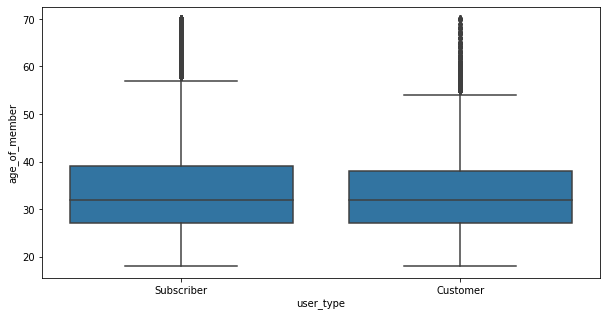

In [61]:
plt.figure(figsize=[10, 5])
sb.boxplot(bikedataframe['user_type'], bikedataframe['age_of_member'], color=defalut_color);
plt.xlabel('user_type');
plt.ylabel('age_of_member');


The subscriber is older than the customer

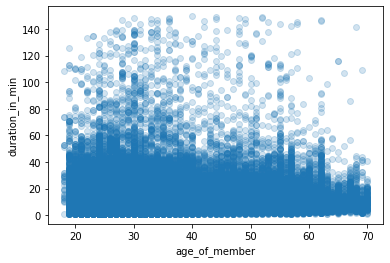

In [62]:
sb.regplot(data = bikedataframe, x = 'age_of_member', y = 'duration_in_min'
           ,scatter_kws={'alpha':1/5},fit_reg = False);


In [63]:
 bikedataframe.groupby(['age_of_member'])['duration_sec'].mean().describe()

count      53.000000
mean      693.384601
std       175.781705
min       532.954802
25%       627.520190
50%       649.604592
75%       690.837704
max      1832.875000
Name: duration_sec, dtype: float64

In [64]:
bikedataframe_age_mean_duration = bikedataframe.groupby(['age_of_member'])['duration_in_min'].mean()

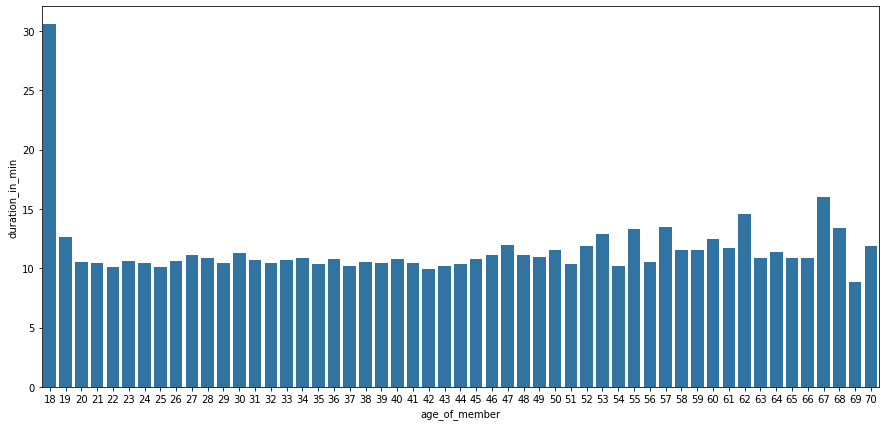

In [117]:
plt.figure(figsize=[15,7])
bar_plot( bikedataframe_age_mean_duration.index,bikedataframe_age_mean_duration.values
         ,xlabel='age_of_member',ylabel='duration_in_min' )

the most age has long trips is **18 years** the average of trip is **30 minutes**

In [66]:
bikedataframe['bike_share_for_all_trip_approved']  = pd.get_dummies(bikedataframe['bike_share_for_all_trip'])['Yes']
bikedataframe.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age_of_member,duration_in_min,week_day_name,start_time_hour,bike_share_for_all_trip_approved
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974,Male,Yes,45,26.416667,Thu,23,1
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,1959,Male,No,60,29.883333,Thu,23,0
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,3803,Subscriber,1983,Female,No,36,19.116667,Thu,23,0
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,6329,Subscriber,1989,Male,No,30,26.916667,Thu,23,0
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,6548,Subscriber,1988,Other,No,31,26.166667,Thu,23,0


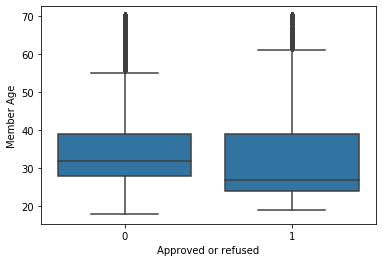

In [67]:
sb.boxplot(data=bikedataframe,  x='bike_share_for_all_trip_approved',y='age_of_member', color=defalut_color);
plt.xlabel('Approved or refused');
plt.ylabel('Member Age');

the median age of users that bike is refused share is 34 years, and median age for approved bike is 28 years

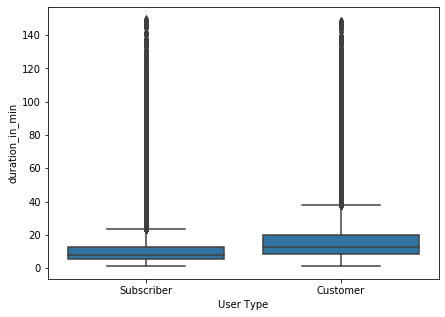

In [68]:
plt.figure(figsize=[7,5])
sb.boxplot(bikedataframe['user_type'], bikedataframe['duration_in_min'], color=defalut_color);
plt.xlabel('User Type');
plt.ylabel('duration_in_min');

The customers who vary more and generally hire the bikes for longer periods of time, it appears that subscribers have a more focused usage or intended aim when using the bikes.

In [110]:
days = ['Sat','Sun','Mon','Tue','Wed','Thu','Fri']

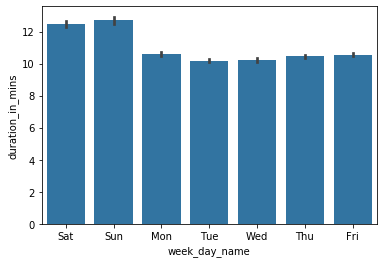

In [119]:
bar_plot(bikedataframe['week_day_name'],bikedataframe['duration_in_min'],order=days,xlabel='week_day_name',
ylabel='duration_in_mins' )


Normally the weekends have riding trips more than week work days

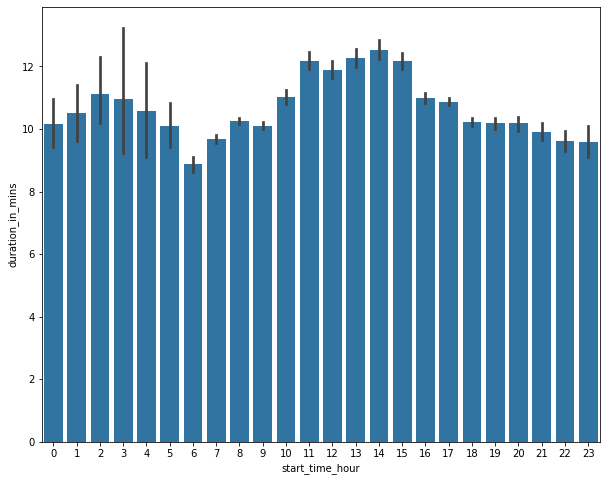

In [120]:
plt.figure(figsize=[10,8])
bar_plot(bikedataframe['start_time_hour'],bikedataframe['duration_in_min'],xlabel='start_time_hour',
ylabel='duration_in_mins' )


From **11 AM to 3 PM** in day users ride trips more than the rest of the day

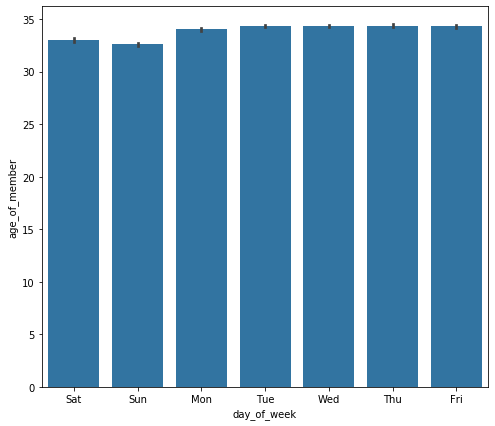

In [122]:
plt.figure(figsize=[8,7])
bar_plot(bikedataframe['week_day_name'], bikedataframe['age_of_member'],order = days ,xlabel='day_of_week',
ylabel='age_of_member' )


The age is similar in all week days except weekends, sunday and saturday the users in these days is smaller than users in week work days

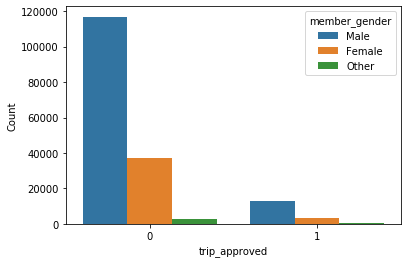

In [75]:
sb.countplot(bikedataframe['bike_share_for_all_trip_approved'], hue=bikedataframe['member_gender']);
plt.xlabel('trip_approved');
plt.ylabel('Count');

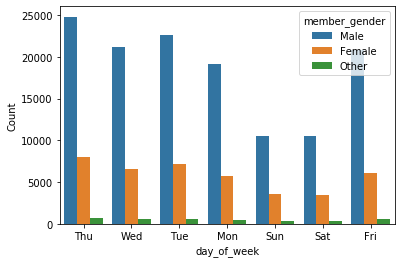

In [76]:
sb.countplot(bikedataframe['week_day_name'], hue=bikedataframe['member_gender']);
plt.xlabel('day_of_week');
plt.ylabel('Count');

There was much more males users than females users overall.

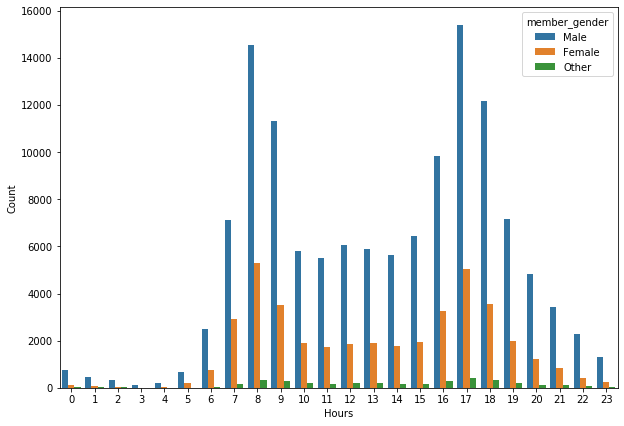

In [77]:
plt.figure(figsize=[10,7])
sb.countplot(bikedataframe['start_time_hour'], hue=bikedataframe['member_gender']);
plt.xlabel('Hours');
plt.ylabel('Count');

Duration time increases every saturday and sunday thats mean the users riding trips more times in weekends. Females ride trips longer than males. A lot of users don't clairfy their gender

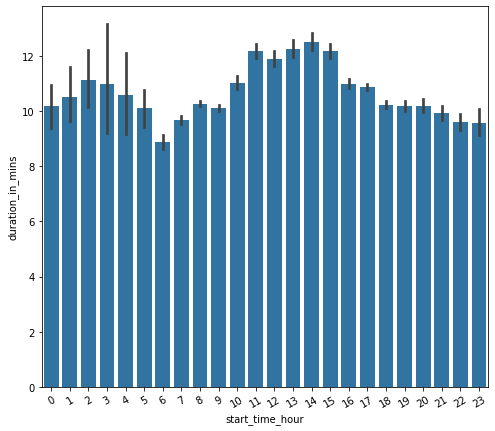

In [124]:
plt.figure(figsize=[8,7])
bar_plot(bikedataframe['start_time_hour'], bikedataframe['duration_in_min'],xlabel='start_time_hour',
ylabel='duration_in_mins' );

plt.xticks(rotation=30);

we found that the most hour that users ride is 3 AM 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Subscriber usage is far higher than customer usage. Subscribers and customers have quite different riding goals and patterns. The purpose for Subscriber is going to work and back from it, hence the majority of trips occurred during business hours (Mon-Fri),Customers prefer to ride for enjoyment on weekends in the afternoons or early evenings. Subscribers are older than customer users.

> There was much more males users than females users overall in all days

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It is interesting to see that from 11 AM to 3 PM in day users ride trips more than the rest of the day

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

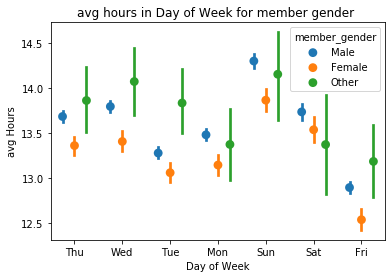

In [87]:
sb.pointplot(bikedataframe['week_day_name'], bikedataframe['start_time_hour'], hue=bikedataframe['member_gender'], dodge=0.5, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('avg Hours');
plt.title("avg hours in Day of Week for member gender ");

Females bikers ride earlier than males biker 

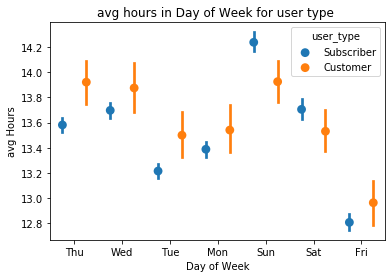

In [85]:
sb.pointplot(bikedataframe['week_day_name'], bikedataframe['start_time_hour'], hue=bikedataframe['user_type'], dodge=0.5, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('avg Hours');
plt.title("avg hours in Day of Week for user type ");


In all days except weekends the customers ride earlier than subscribers, but in weekends opposite

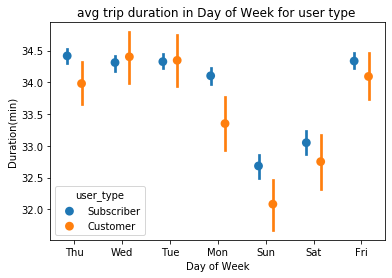

In [88]:
sb.pointplot(data=bikedataframe, x='week_day_name', y='age_of_member', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Duration(min)');
plt.title("avg trip duration in Day of Week for user type ");


the subscribers are older than customers. In weekends the bikers smaller than bikers in the rest of day

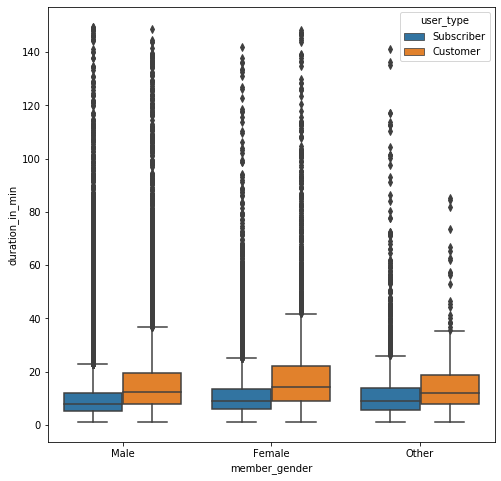

In [84]:
plt.figure(figsize=[8,8])
sb.boxplot(bikedataframe['member_gender'],bikedataframe['duration_in_min'], hue = bikedataframe['user_type'])


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [83]:
bikedataframe.to_csv('cleaned_data_bike_share.csv', index=False)